<a href="https://colab.research.google.com/github/Himagination/Machine_Learning_Projects_Python/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Prices Dataset
**California census data includes metrics such as population, median income, median housing price, etc. for each block group in California. Model should learn from this data and be able to predict the median housing price in any block(or district) given all other metrics.**

## Look at the big picture.
*  Objective of the model: The model's output i.e a prediction of a district's median housing price will be fed to another Machine Learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area or not.
*  This will be a typical Supervised Learning task, specifically muultiple regression as suystem will have multiple features to make a prediction. It is also a univariate regression as we are only trying to predict a single value for each district.

## Get the data.

In [ ]:
housing_url = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
import pandas as pd
housing = pd.read_csv(housing_url)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*  *total_bedrooms* attributes has 20433 count while there are total 20640 instances, i.e there are missing values in *total_attribute* column.
*  All attributes except *ocean_proximity* are numerical.

In [ ]:
# Inspecting ocean_proximity columns
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


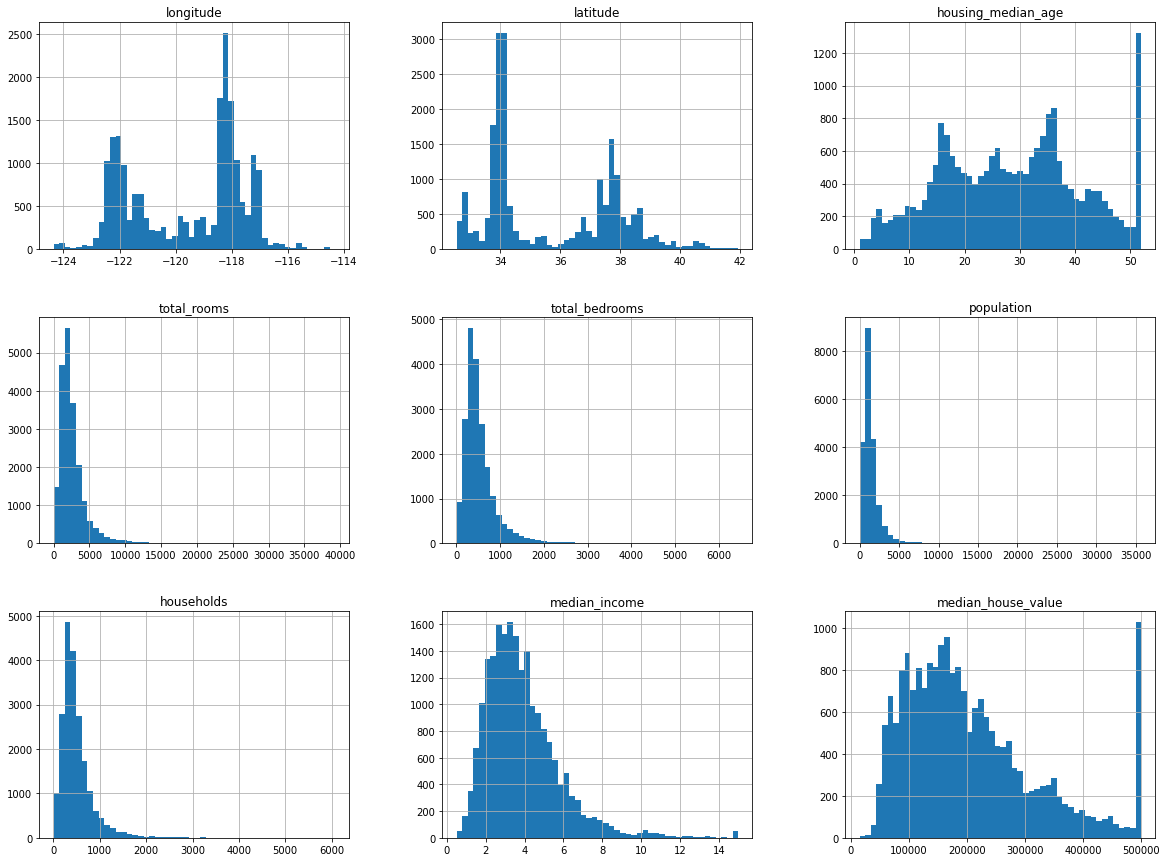

In [ ]:
# Plot histograms for better visualization of dataset.
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Create a Test Set.**
*  Using startified sampling to split dataset into train and test.
*  Observing median income values, most of the income are clustered around 1.5 to 6 but some median income goes beyond 6. Hence, it is important to have sufficient number of instances in your dataset for each group.
*  We will create an income category with five attributes(0-1.5, 1.5-3, 3-4.5, 4.5-6, more than 6)

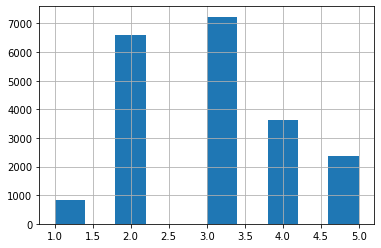

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3., 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing.income_cat.hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=31415926)
for train_index, test_index in split.split(housing, housing.income_cat):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [15]:
# Creating a copy of training set to play around
housing = strat_train_set.copy()

## Discover and Visualize the data to gain insights.
*  Visualizing Geographical Data.
*  Looking for Correlations.
*  Experimenting with Attribute Combinations.

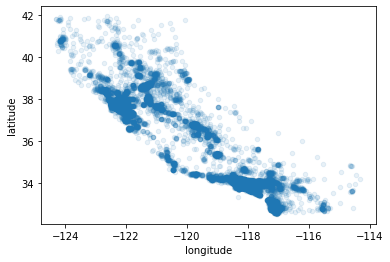

In [16]:
# Visualizing latitude and longitude.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

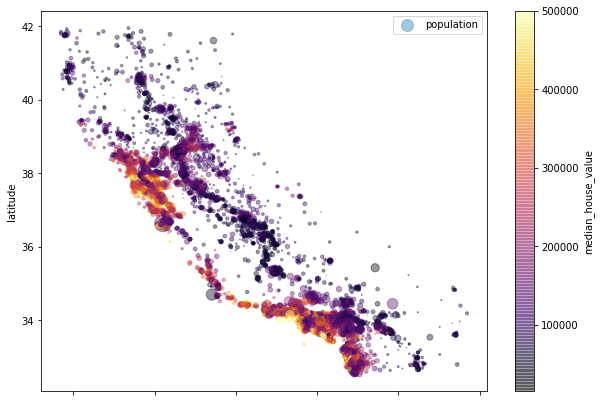

In [17]:
# Visualizing housing prices
housing.plot(kind="scatter", x="longitude", y ="latitude", alpha=0.4, 
             s=housing.population/100, label="population", figsize=(10,7), 
             c="median_house_value", cmap=plt.get_cmap("inferno"), colorbar=True,)
plt.legend()

**Above image tells us that housing prices are very much related to location and to poulation density.**

In [18]:
# Looking for correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688822
total_rooms           0.135834
housing_median_age    0.106708
households            0.069491
total_bedrooms        0.052202
population           -0.021422
longitude            -0.050002
latitude             -0.139991
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225d43bd50>,
      dtype=object)

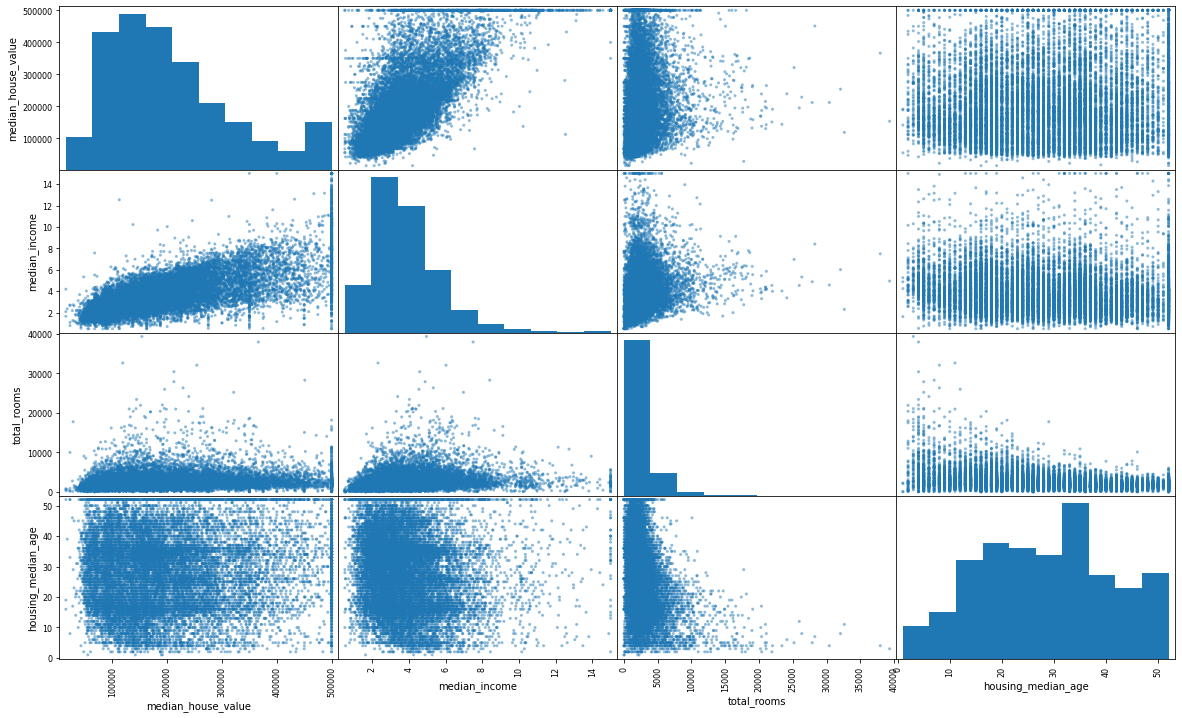

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20,12))

*median_income shows the most promising correlation with median house value.*

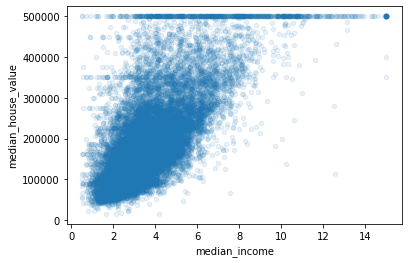

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [22]:
# Trying out various attribute
housing["rooms_per_household"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["population_per_household"] = housing.population/housing.households
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688822
rooms_per_household         0.163451
total_rooms                 0.135834
housing_median_age          0.106708
households                  0.069491
total_bedrooms              0.052202
population                 -0.021422
population_per_household   -0.026650
longitude                  -0.050002
latitude                   -0.139991
bedrooms_per_room          -0.254863
Name: median_house_value, dtype: float64

## Prepare the data for Machine Learning Algorithms.

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [24]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[["ocean_proximity"]]

In [25]:
# Transformation Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")), 
                         ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
from sklearn.compose import ColumnTransformer
num_attr = list(housing_num)
cat_attr = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attr), 
                                   ("cat", OneHotEncoder(), cat_attr)
])
housing_prepared = full_pipeline.fit_transform(housing)

## Select a model and train it.
*  LinearRegression
*  DecisionTreeRegressor
*  RandomForestRegressor

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [265834.35530157 168792.24256719 109906.3092594  367479.66409016
 117464.52612766]
Labels:  [238200.0, 265900.0, 225000.0, 438100.0, 106300.0]


In [29]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68419.92591968858

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [31]:
# Using Cross-Validation for better evaluation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [34]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(67645.82977178381, 2463.0413619634674)

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18207.44304924221

In [38]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear', C=0.5)
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

114857.98188241337

### RandomForest Algorithm returned Best result.

## Fine-tune your model.
*  Grid Search
*  Randomized Search

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [40]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63529.53776685389 {'max_features': 2, 'n_estimators': 3}
55653.27544067559 {'max_features': 2, 'n_estimators': 10}
52541.592122526454 {'max_features': 2, 'n_estimators': 30}
60094.99525107256 {'max_features': 4, 'n_estimators': 3}
53087.38209831409 {'max_features': 4, 'n_estimators': 10}
50601.578588252254 {'max_features': 4, 'n_estimators': 30}
58446.270688548626 {'max_features': 6, 'n_estimators': 3}
51479.39321593325 {'max_features': 6, 'n_estimators': 10}
49788.65688149785 {'max_features': 6, 'n_estimators': 30}
57945.23260681543 {'max_features': 8, 'n_estimators': 3}
51661.92943586207 {'max_features': 8, 'n_estimators': 10}
49655.51552153954 {'max_features': 8, 'n_estimators': 30}
61913.43810276158 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54240.12758012619 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60108.54412528357 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52303.23532839479 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [43]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [44]:
random_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [45]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

51966.41030632474 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
58124.788266525866 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
51719.1037548061 {'n_estimators': 10, 'max_features': 8}
63546.27502225047 {'n_estimators': 3, 'max_features': 2}
53057.235838891225 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
50045.74907092841 {'n_estimators': 30, 'max_features': 6}
52582.054150812335 {'n_estimators': 30, 'max_features': 2}
59820.151625603045 {'n_estimators': 3, 'max_features': 4}
54322.669470925335 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
59826.62777134052 {'n_estimators': 3, 'max_features': 6}


In [47]:
# Evaluate on the Test Set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48764.18127009488